<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  >=3.7<br/>
<b>Networkx version:</b>  >=2.3<br/>
<b>Last update:</b> 16/02/2021
</span>

<a id='top'></a>
# *Chapter 6: Centrality & Assortative Mixing*

In this notebook are introduced basilar analysis to cover node centrality and assortative mixing.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. 

In [16]:
!pip install networkx==2.8.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

In [18]:
%matplotlib inline 

In [19]:
def read_net(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1])
    return g

# Game of Thrones data
season = 6
g = read_net(f'data/asioaf/got-s{season}-edges.csv')

houses = {}
with open(f'data/asioaf/got-s{season}-nodes_ext.csv') as f:
    f.readline()
    for l in f:
        node, _, house = l.rstrip().split(",")
        g.add_node(node, house=house)

# node position for plotting
pos = nx.spring_layout(g)

In [20]:
# Support function to plot networks (only small graphs)
def draw_net(G, pos, measures, measure_name):
    
    plt.figure(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

## Centrality measures

We can measure nodes importance using so-called centrality.

**Bad term:** 
- nothing to do with being central in general

**Usage:**
- Some centralities have straightforward interpretation
- Centralities can be used as node features for machine learning on graph


Node centrality measures can be easily computed in python using ``networkx`` as follows

### Degree Centrality

How many neighbors does a node have?

In [21]:
degrees = dict(g.degree()) # compute the degree of a set of nodes (if specified).

In [22]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 40), ('JON', 31), ('CERSEI', 27), ('TYRION', 26), ('JAIME', 24)]

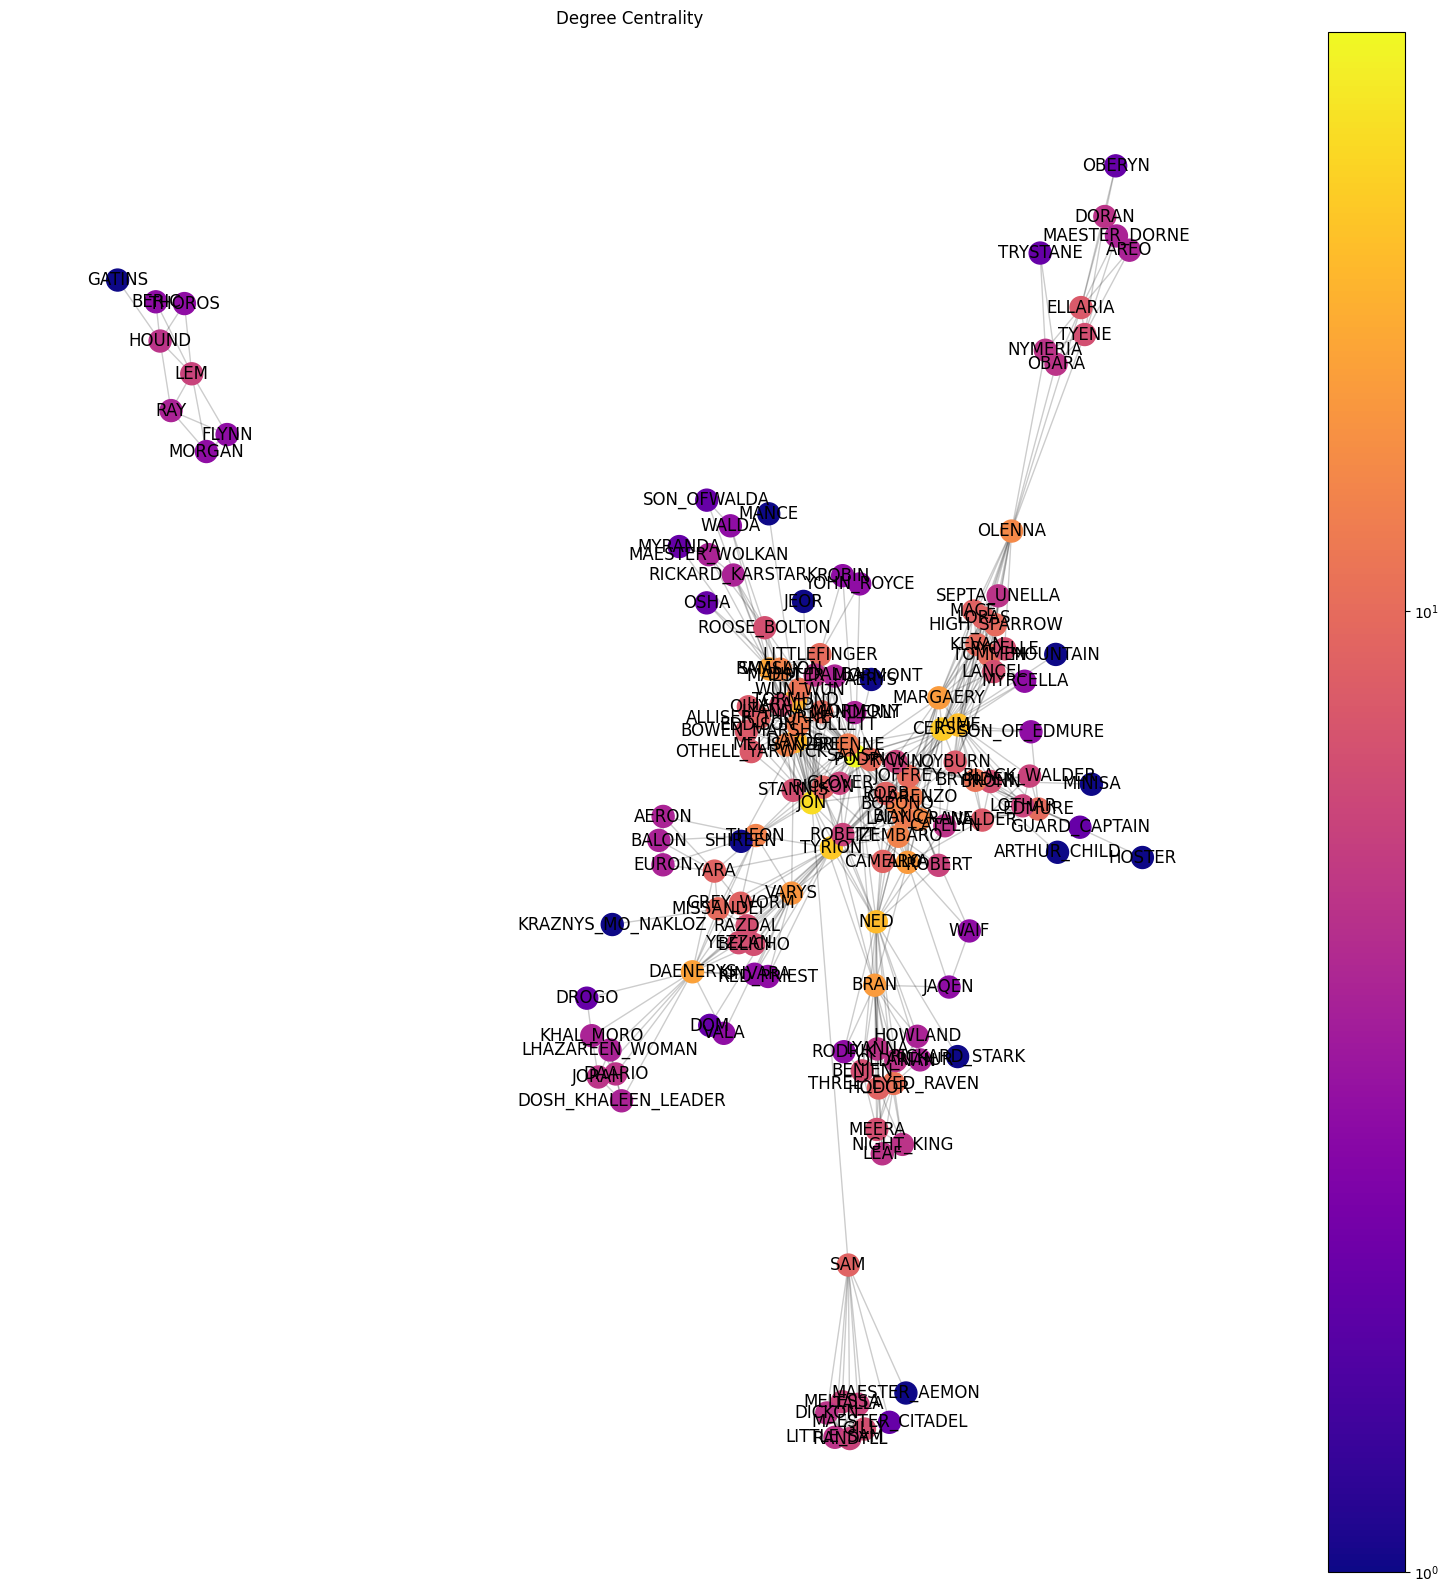

In [23]:
draw_net(g, pos, degrees, 'Degree Centrality')

### Closeness Centrality

**Farness:** average of length of shortest paths to all other nodes

**Closeness:** inverse of the Farness  (normalized by number of nodes)


In [24]:
closeness = nx.closeness_centrality(g) # compute the closeness centraliry of all nodes 

In [25]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.48437799501629286),
 ('TYRION', 0.4296366462644516),
 ('JON', 0.4238307456392563),
 ('CERSEI', 0.4181796690307329),
 ('JAIME', 0.4140392762680523)]

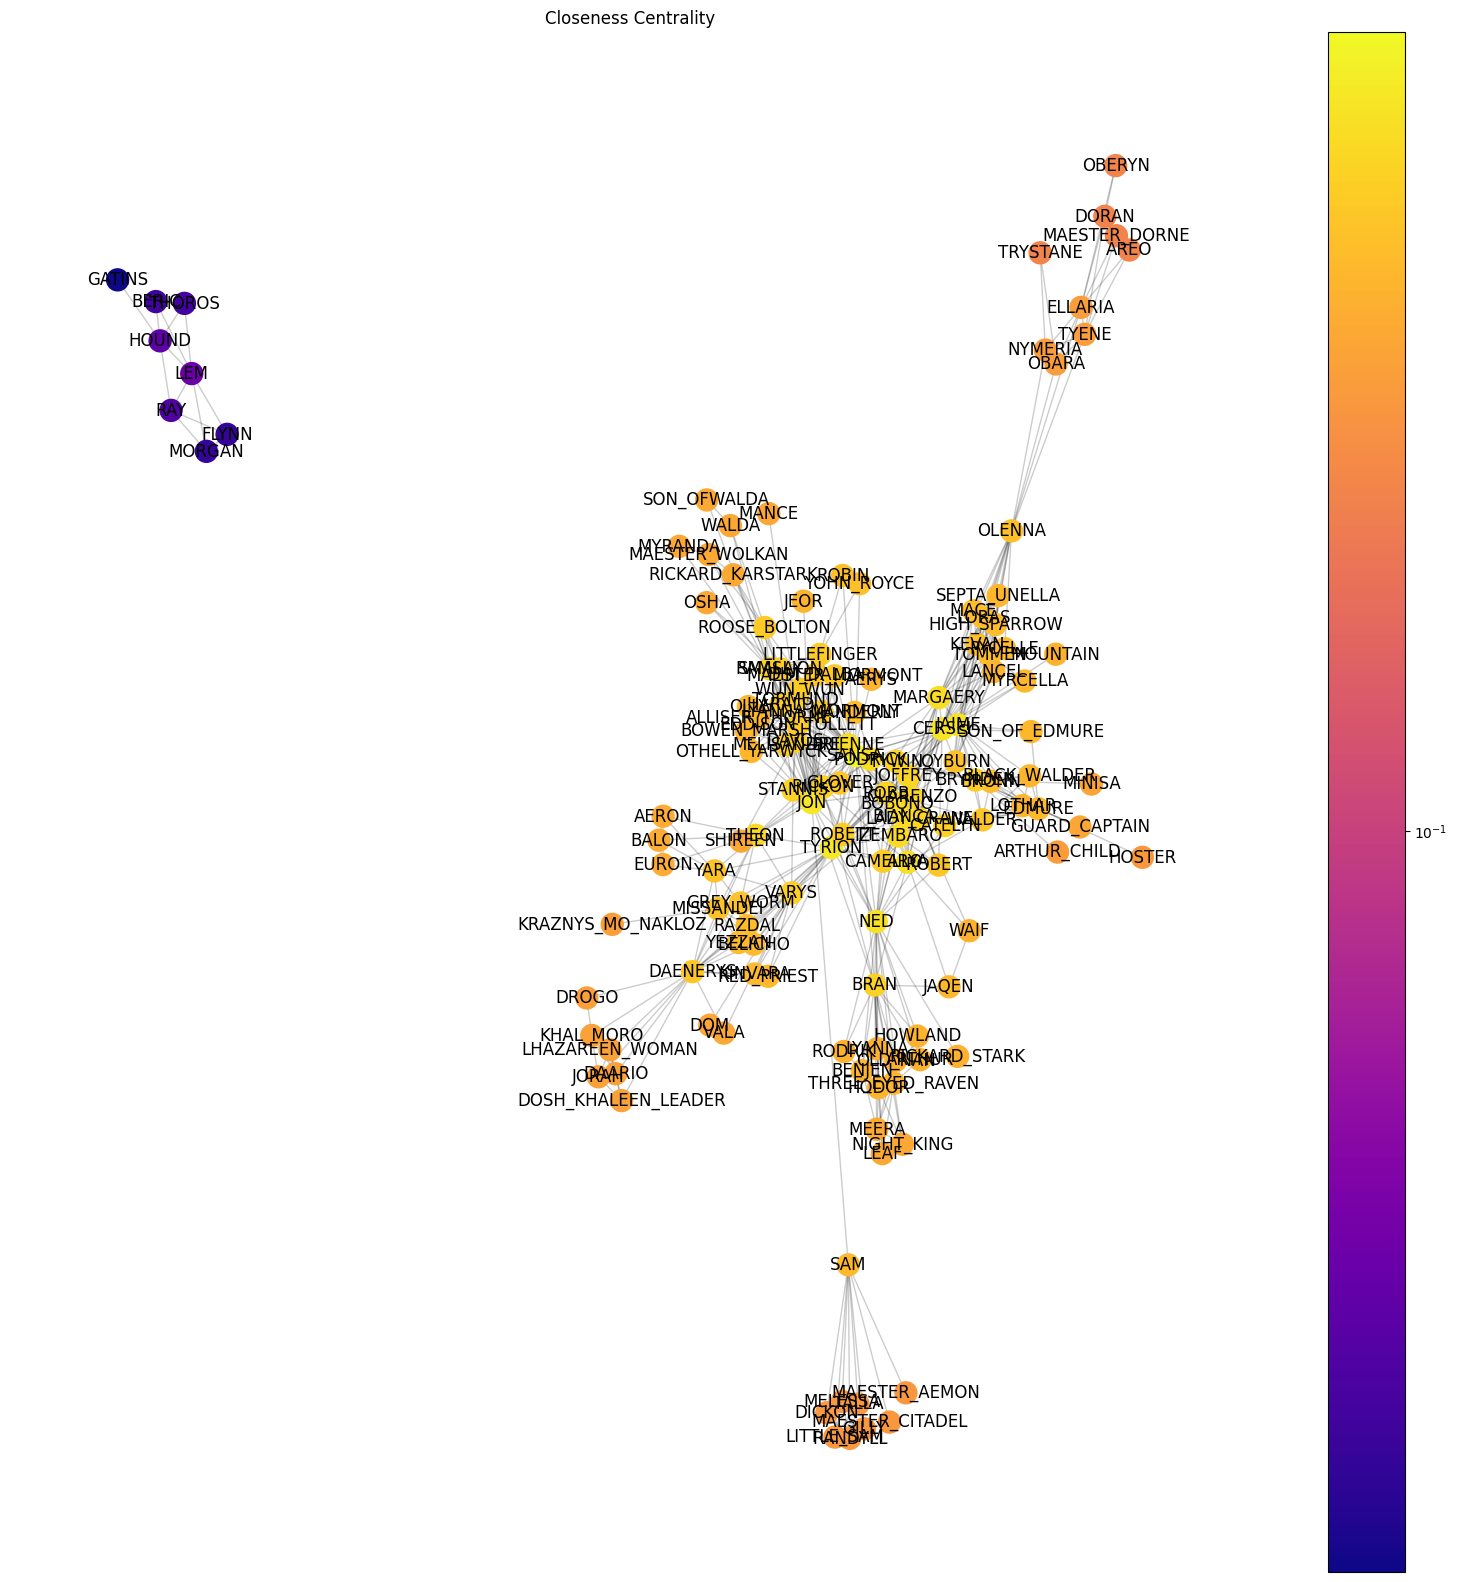

In [26]:
draw_net(g, pos, closeness, 'Closeness Centrality')

### Betweenness Centrality

Number of shortest paths that go through  a node.

**Assumption:** important vertices are bridges over which information flows

**Practically:** if information spreads via shortest paths, important nodes are found on many shortest paths


In [27]:
betweenness = nx.betweenness_centrality(g) # compute the betweenness centraliry of all nodes 

In [28]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.2626236959730493),
 ('JON', 0.19134542283724257),
 ('TYRION', 0.14853156113828941),
 ('JAIME', 0.13044955131298),
 ('CERSEI', 0.11721858119776944)]

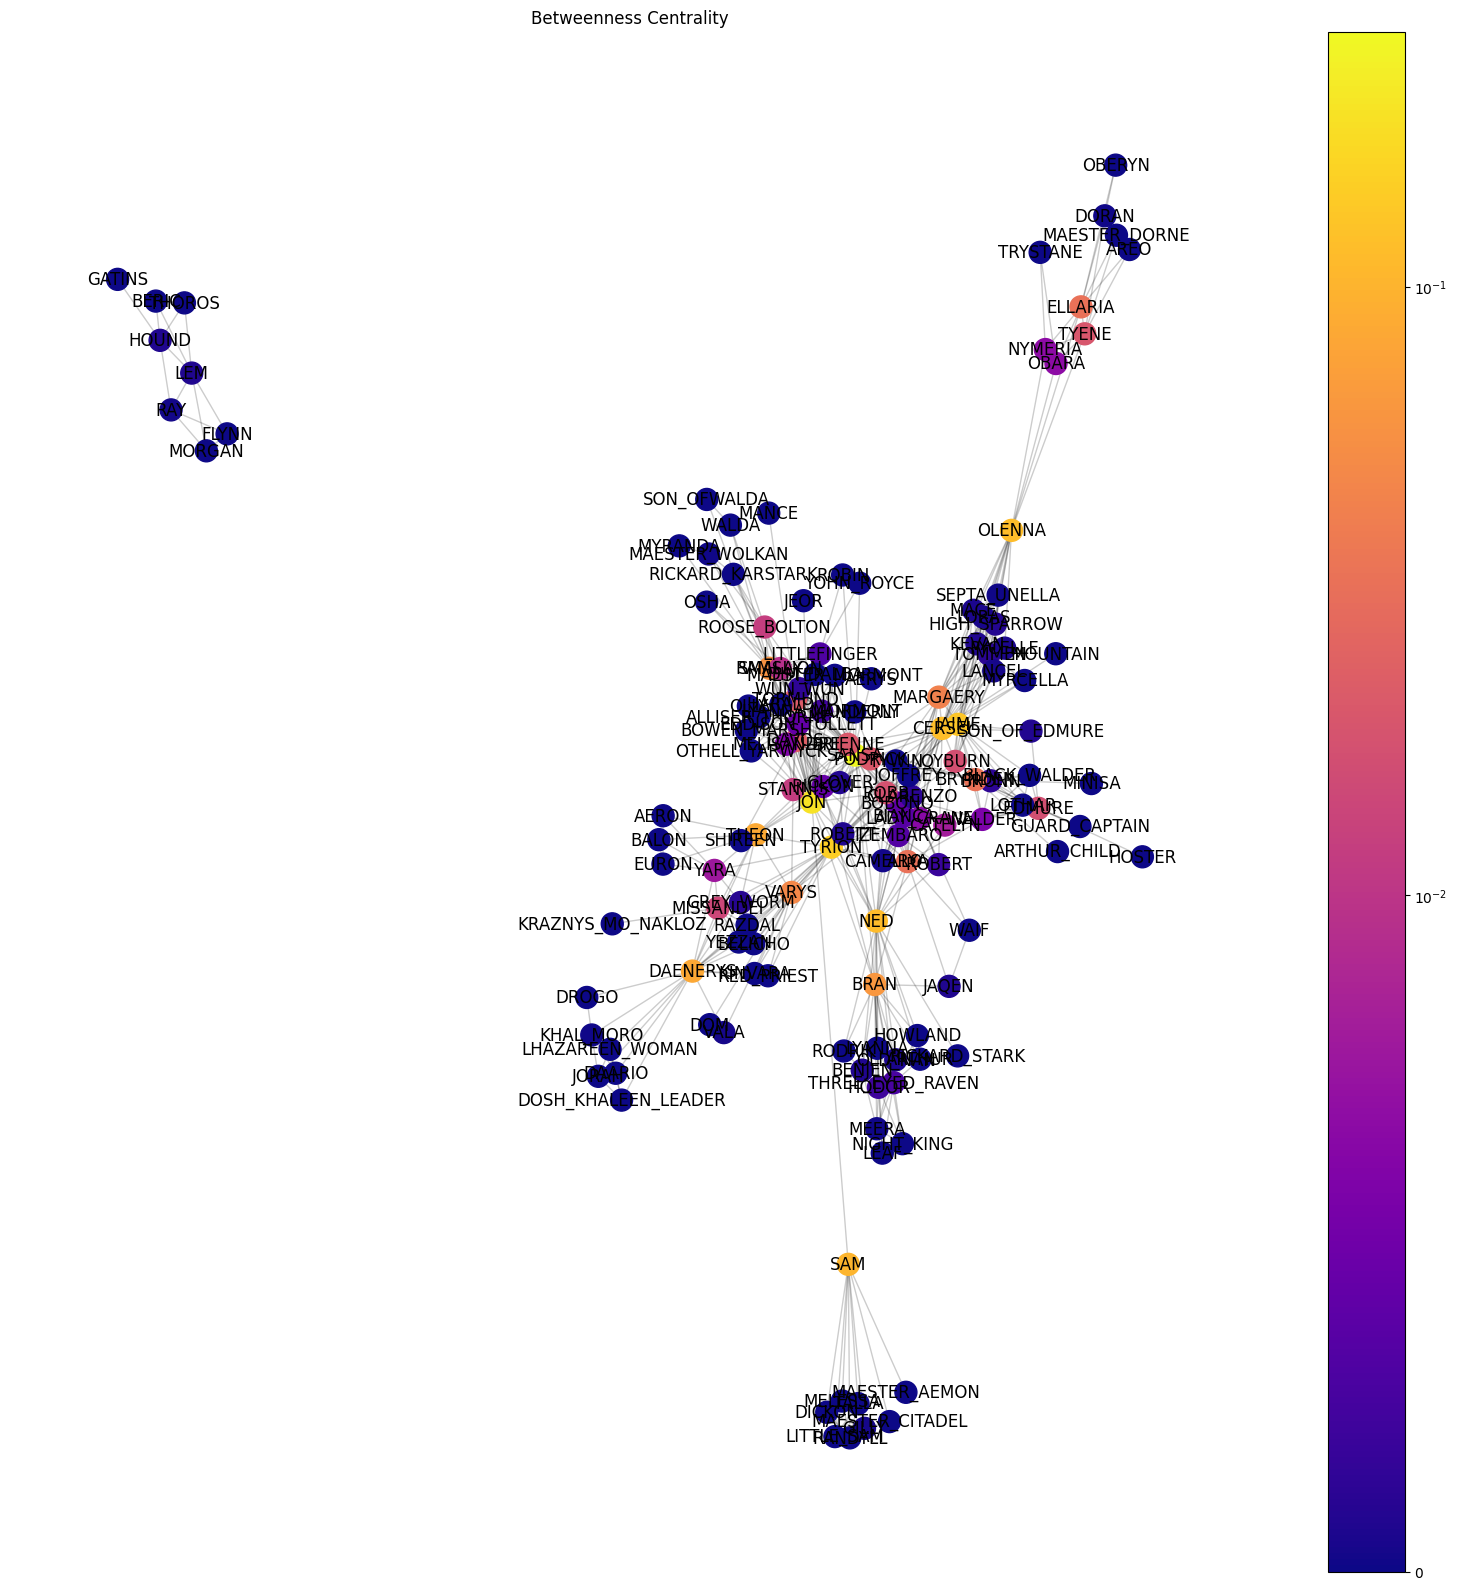

In [29]:
draw_net(g, pos, betweenness, 'Betweenness Centrality')

### Harmonic Centrality

Harmonic mean of the geodesic (shorted paths) distances from a given node to all others.


In [30]:
harmonic = nx.harmonic_centrality(g)

In [31]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 81.41666666666666),
 ('JON', 73.33333333333336),
 ('TYRION', 71.91666666666667),
 ('CERSEI', 70.5),
 ('JAIME', 69.0)]

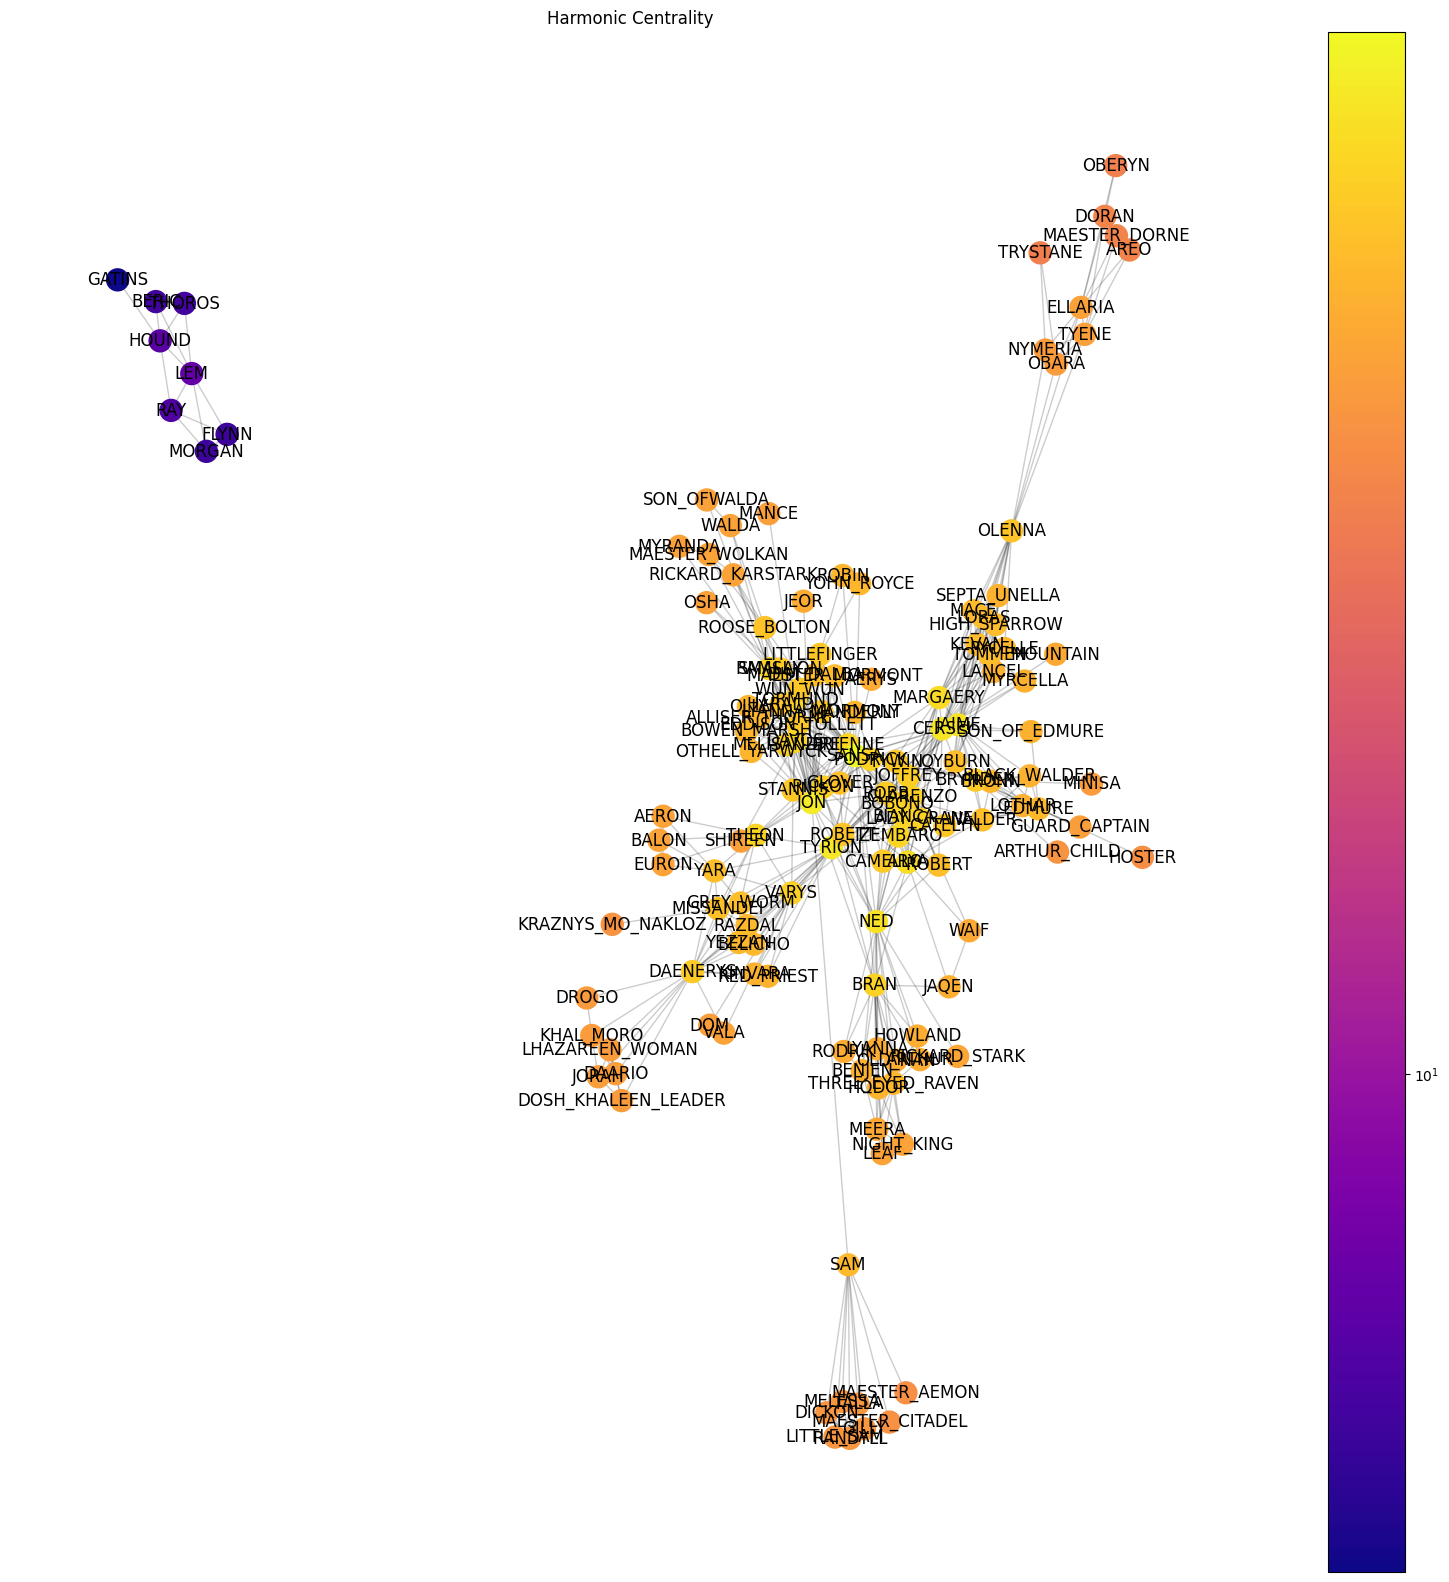

In [32]:
draw_net(g, pos, harmonic, 'Harmonic Centrality')

### PageRank 

**Main idea:** The PageRank computation can be interpreted as a Random Walk process with restart

Probability that the RW will be in node i next step depends only on the current node j and the transition probability
 j ➝ i determined by the stochastic matrix
- Consequently this is a first-order Markov process
- Stationary probabilities (i.e., when walk length tends towards ∞ ) of the RW to be in node i gives the PageRank of the node


In [33]:
pagerank = nx.pagerank(g)

In [34]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.028391061534083675),
 ('JON', 0.023390907243602793),
 ('CERSEI', 0.020278587723368137),
 ('TYRION', 0.02018889875063729),
 ('JAIME', 0.018551927013827622)]

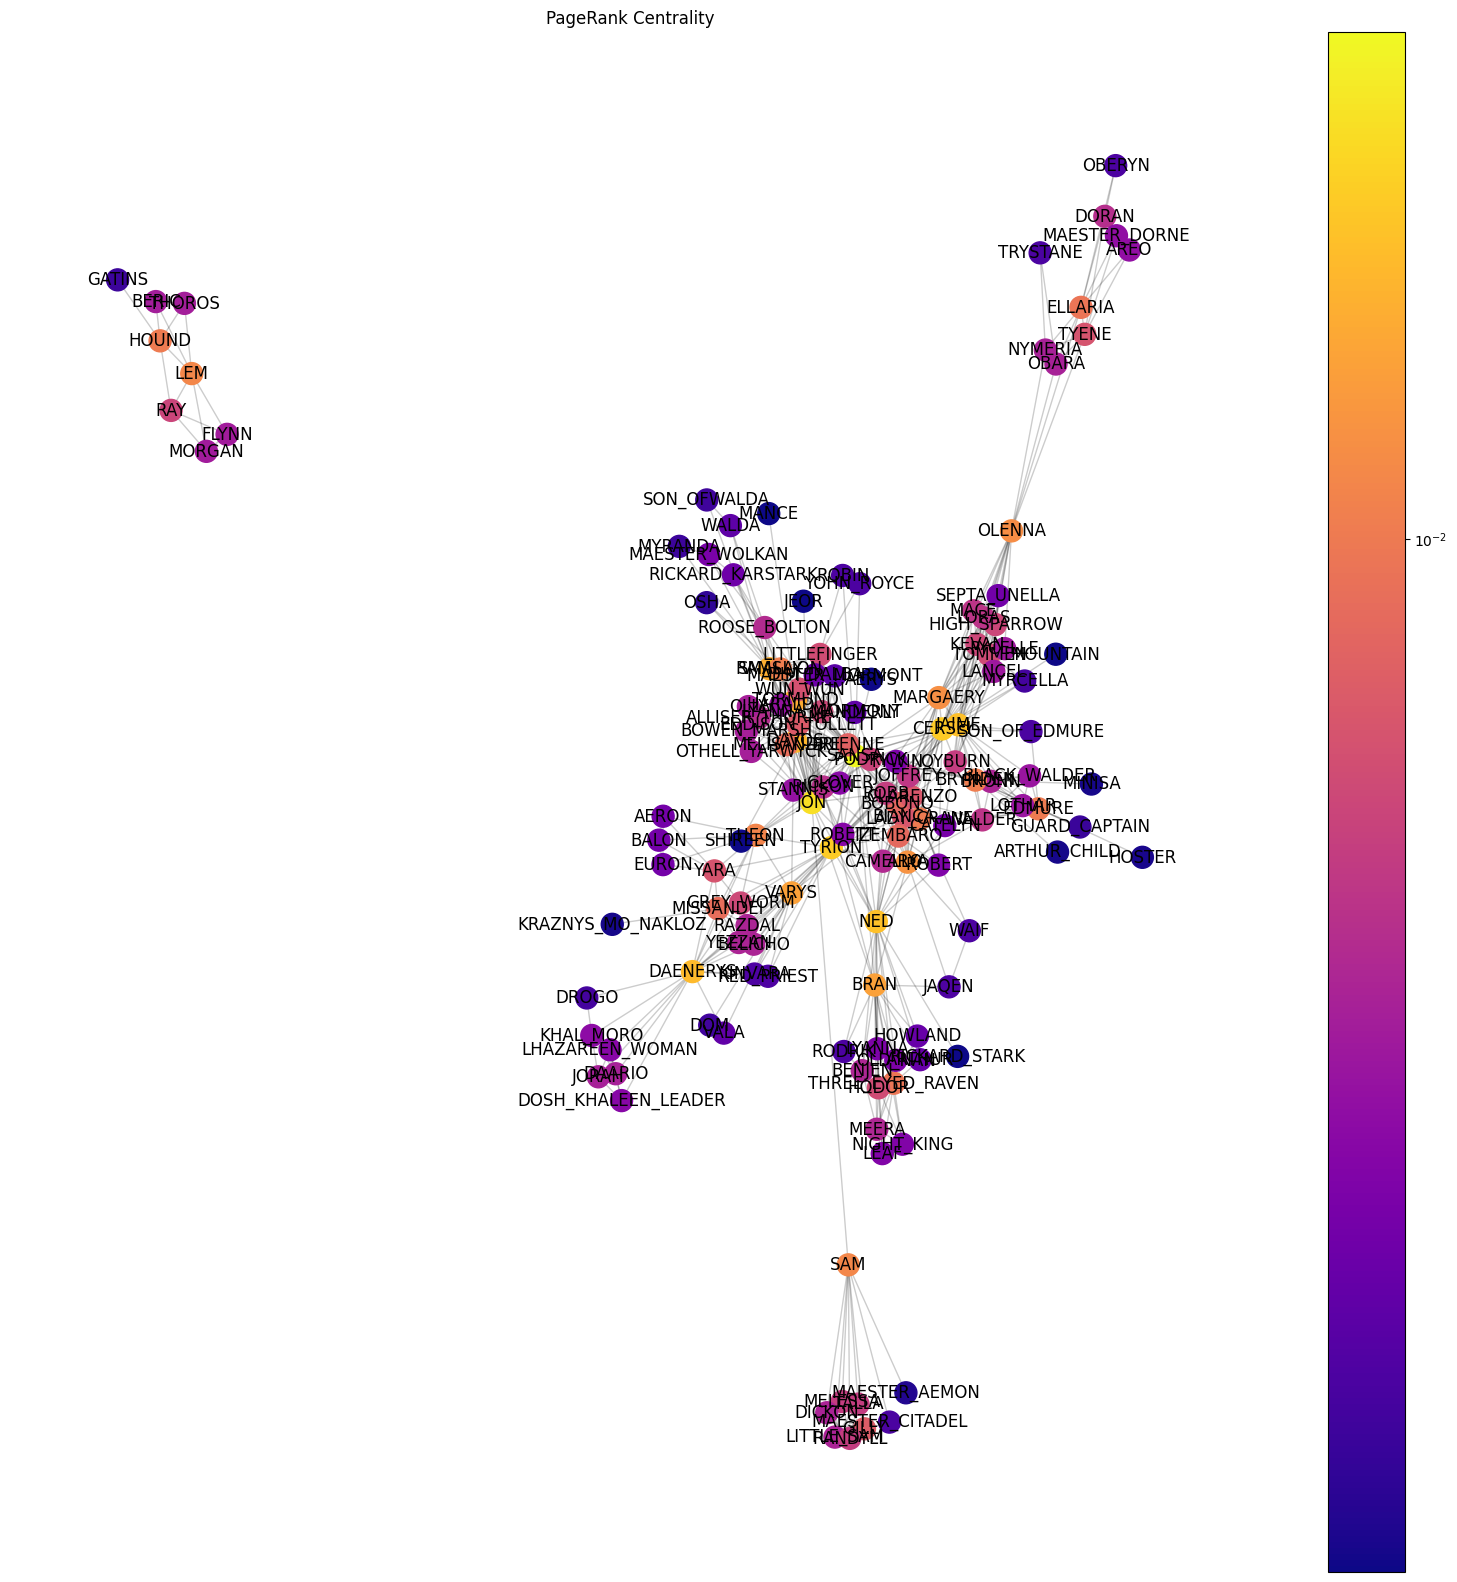

In [35]:
draw_net(g, pos, pagerank, 'PageRank Centrality')

### Eigenvector Centrality

A pair of eigenvector (x) and eigenvalue (λ) is defined by the relation:

    Ax = λx

- x is a vector of size N that can be interpreted as the nodes scores
- Ax yield a new vector of the same size which corresponds for each node to the sum of the received scores from its neighbors
- the equality implies that the new scores are proportional to the previous ones


In [36]:
eigen = nx.eigenvector_centrality(g)

In [37]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.3681703250620049),
 ('JON', 0.25752583885620856),
 ('DAVOS', 0.2120919196122236),
 ('TORMUND', 0.20473555675107596),
 ('TYRION', 0.200968439452155)]

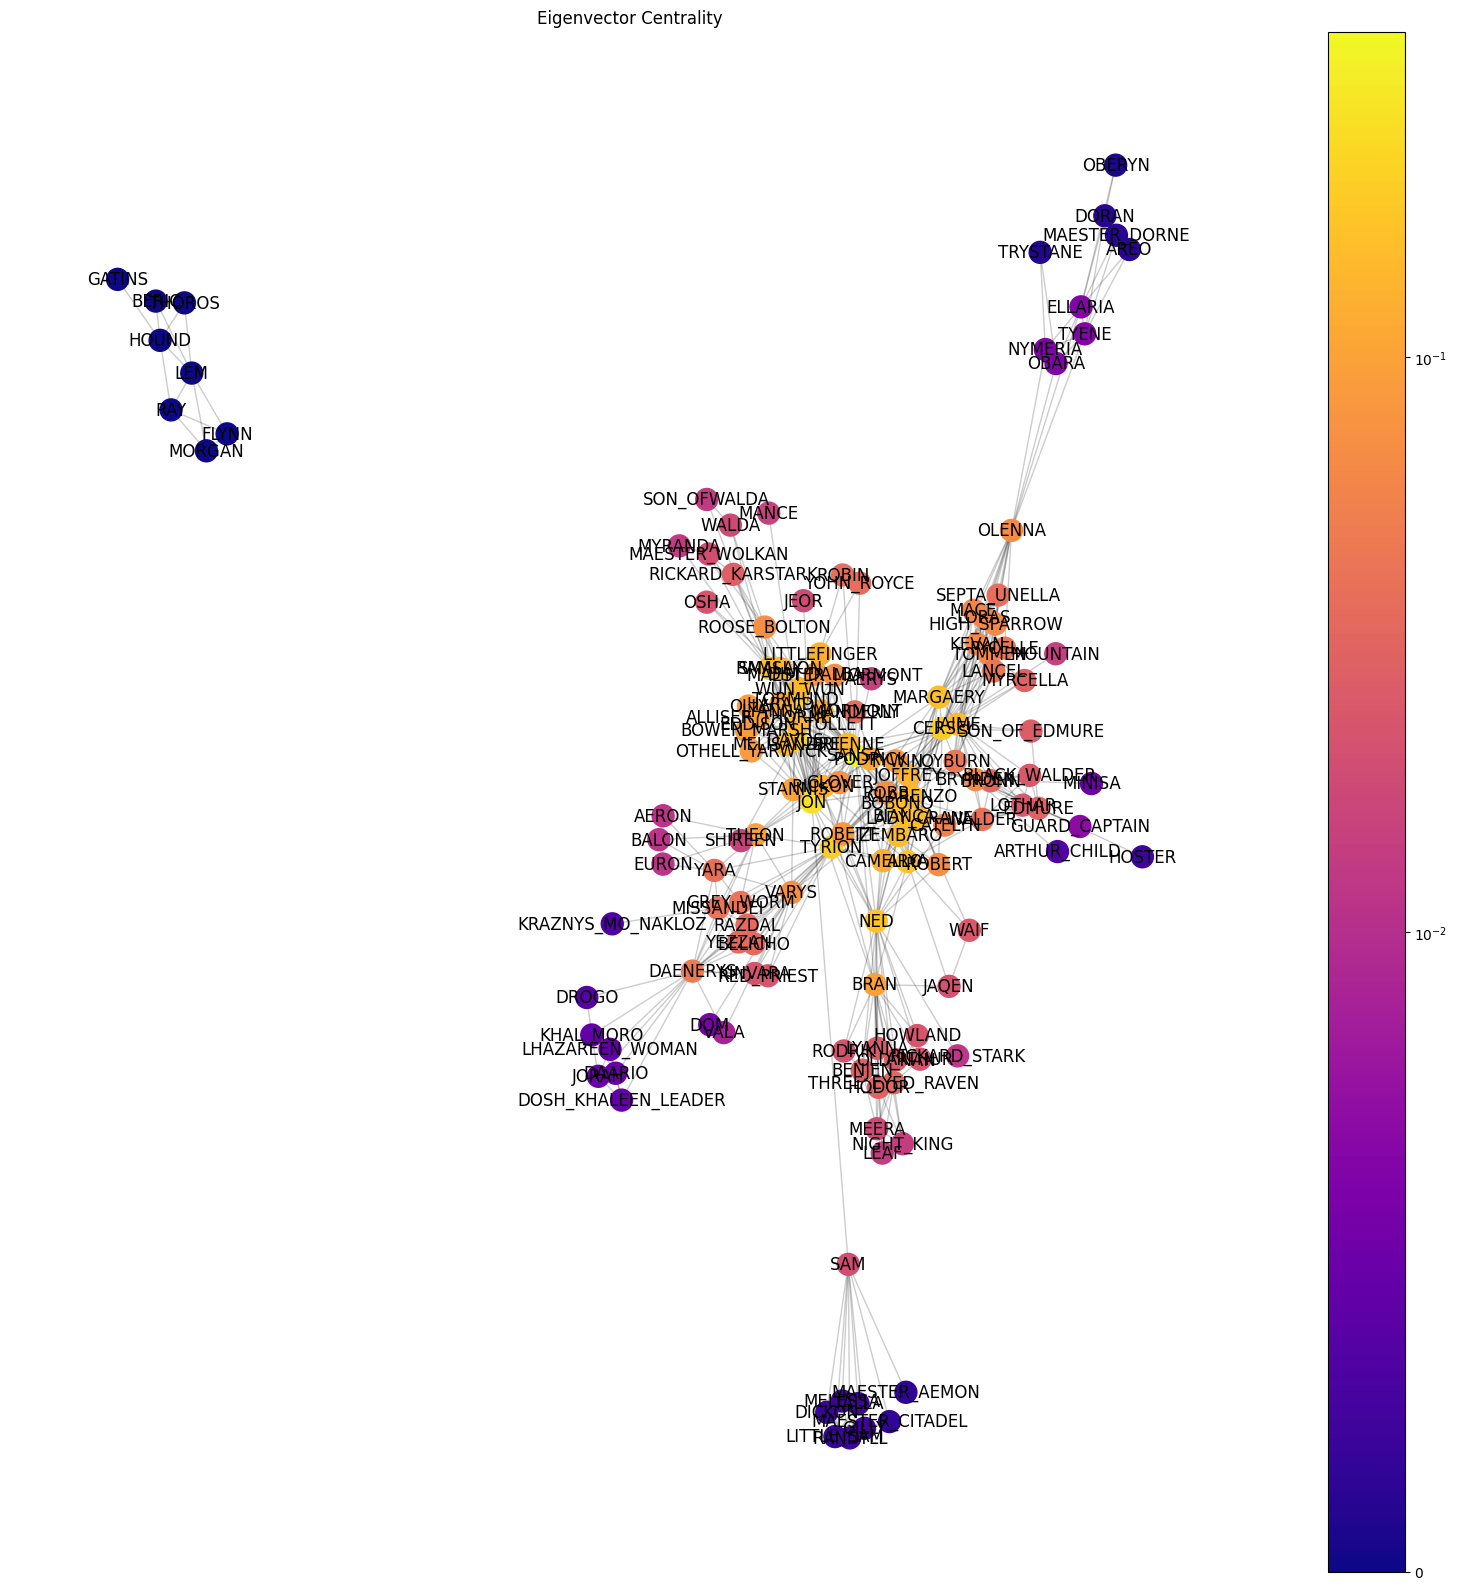

In [38]:
draw_net(g, pos, eigen, 'Eigenvector Centrality')

## Assortative Mixing

**Homophily** Property of (social) networks that nodes of the same attitude tends to be connected with
a higher probability than expected

It appears as correlation between vertex properties of x(i) and x(j) if (i,j) ∈ E


**Disassortative mixing:**
Contrary of homophily: dissimilar nodes tend to be connected 
(e.g., sexual networks, predator-prey)



### Network wide (global) Assortativity measures

#### Newman's Assortativity

Quantify homophily while scalar node properties are involved (e.g., degree)

*Degree assortative*
- Nodes tends to connect homogeneously w.r.t. their degree (e.g., hubs with hubs)

*Degree disassortative*
- Nodes tends to connect in a star-like topology


In [39]:
nx.degree_assortativity_coefficient(g)

-0.006283179316286868

#### KNNK

*What's the expected neighbors' degree of a node given its degree?*

In [40]:
knn = nx.k_nearest_neighbors(g) #calculate the average nearest neighbor degree of nodes with degree k.
knn = dict(sorted(knn.items()))

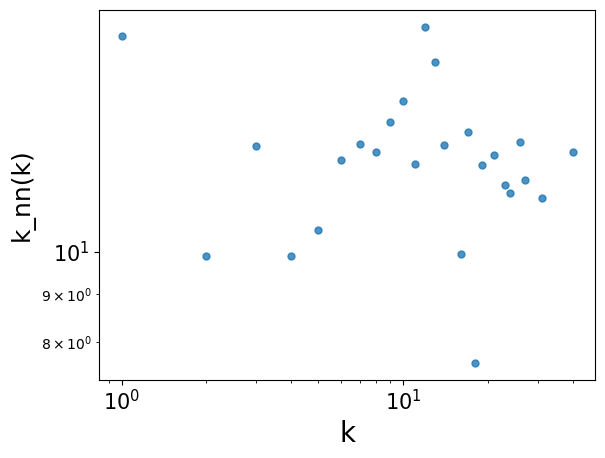

In [41]:
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)
plt.loglog()
plt.xlabel("k", fontsize=20)
plt.ylabel("k_nn(k)",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Newman Assortativity on node properties

Same as the standard Newman's assortativity but computed on semantic information attached to nodes (e.g., labels)

In [42]:
nx.attribute_assortativity_coefficient(g, 'house')

0.20747480547396627

### Node (local) Assortativity measures

**Idea:**
A local measure that captures the mixing patterns within the local neighbourhood of a given node.